In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
from matplotlib.axes import Axes
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

## Datasets

In [2]:
# Load weather data
weather_data = pd.read_csv('../data/weather.csv')
weather_data

,year,month,tokyo_mean,tokyo_high,tokyo_low,sapporo_mean,sapporo_high,sapporo_low,naha_mean,naha_high,naha_low
0,1994,1,5.5,16.8,-1.3,-4.7,2.6,-14.0,17.3,24.3,12.0
1,1994,2,6.6,16.0,-2.3,-1.3,7.4,-9.3,17.1,23.6,10.3
2,1994,3,8.1,18.7,2.3,-0.5,10.8,-9.0,17.1,24.5,11.2
3,1994,4,15.8,24.4,4.3,7.0,20.2,-1.2,22.4,28.3,16.6
4,1994,5,19.5,29.3,10.8,13.5,29.2,4.1,23.4,29.2,16.2
...,...,...,...,...,...,...,...,...,...,...,...
366,2024,7,28.7,37.3,22.1,23.3,34.7,13.9,30.5,36.0,25.6
367,2024,8,29.0,35.9,23.3,24.6,34.1,18.2,30.2,34.3,25.3
368,2024,9,26.6,35.1,17.7,19.9,31.5,10.0,28.8,33.6,23.9
369,2024,10,20.6,31.9,11.5,13.8,26.3,2.8,27.6,32.1,22.5


In [3]:
# Get weather data only for 2023
weather_data_2023 = weather_data[weather_data['year'] == 2023]
weather_data_2023

,year,month,tokyo_mean,tokyo_high,tokyo_low,sapporo_mean,sapporo_high,sapporo_low,naha_mean,naha_high,naha_low
348,2023,1,5.7,14.2,-3.4,-4.4,7.6,-13.2,17.5,25.4,8.4
349,2023,2,7.3,19.4,-0.7,-2.7,11.2,-10.5,19.0,25.6,14.2
350,2023,3,12.9,25.0,3.6,4.9,19.1,-5.4,20.0,27.3,12.3
351,2023,4,16.3,26.8,6.6,9.2,21.1,1.5,22.5,28.7,15.2
352,2023,5,19.0,32.2,10.1,13.8,28.9,4.7,24.3,30.0,18.9
353,2023,6,23.2,33.8,15.3,19.3,31.2,8.2,27.2,32.8,23.6
354,2023,7,28.7,37.7,20.7,23.8,34.4,17.0,29.6,34.3,25.4
355,2023,8,29.2,36.7,22.2,26.7,36.3,19.7,28.6,34.0,24.6
356,2023,9,26.7,34.9,18.5,21.5,29.8,12.0,28.7,33.1,24.6
357,2023,10,18.9,29.9,11.4,13.3,24.5,3.1,26.0,32.3,20.7


In [4]:
# Load car data
car_data = pd.read_csv('../data/mtcars.csv')
car_data

,rownames,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


## Plots

### Line plot with shading

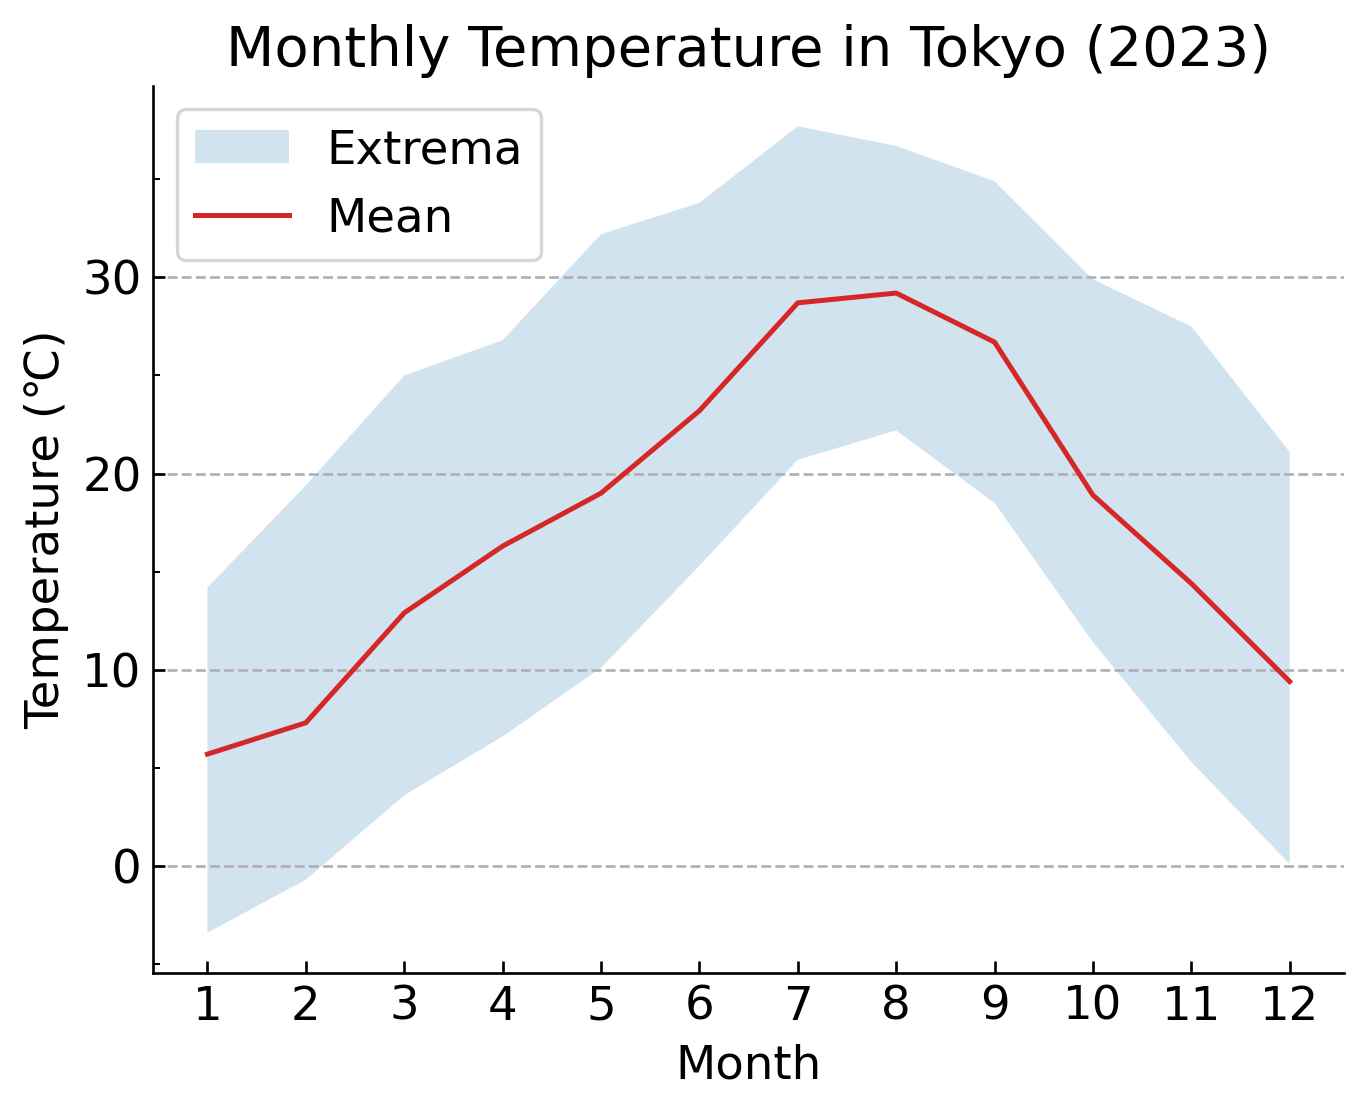

In [ ]:
plt.style.use('example.mplstyle')
fig, ax = plt.subplots()

# Extrema shade
ax.fill_between(
    weather_data_2023['month'],
    weather_data_2023['tokyo_low'],
    weather_data_2023['tokyo_high'],
    alpha=0.2,  # Transparency
    label='Extrema',
)

# Mean line
ax.plot(
    weather_data_2023['month'],
    weather_data_2023['tokyo_mean'],
    color='tab:red',
    label='Mean',
)

# Set x-axis ticks to multiples of 1
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_xlabel('Month')

ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
# Enable minor x-ticks.
ax.yaxis.set_minor_locator(ticker.MultipleLocator(5))
ax.set_ylabel('Temperature (℃)')
# Enable grid for major y-ticks
ax.grid(True, which='major', axis='y')

# Show legend
# In this case, labels are taken from the plotting functions.
ax.legend()

ax.set_title('Monthly Temperature in Tokyo (2023)')

# Save to disk
plt.savefig('figs/monthly_tokyo_2023.png')
plt.savefig('figs/monthly_tokyo_2023.pdf')

# Display in Jupyter notebook
plt.show()

### Line plot with different line and marker styles

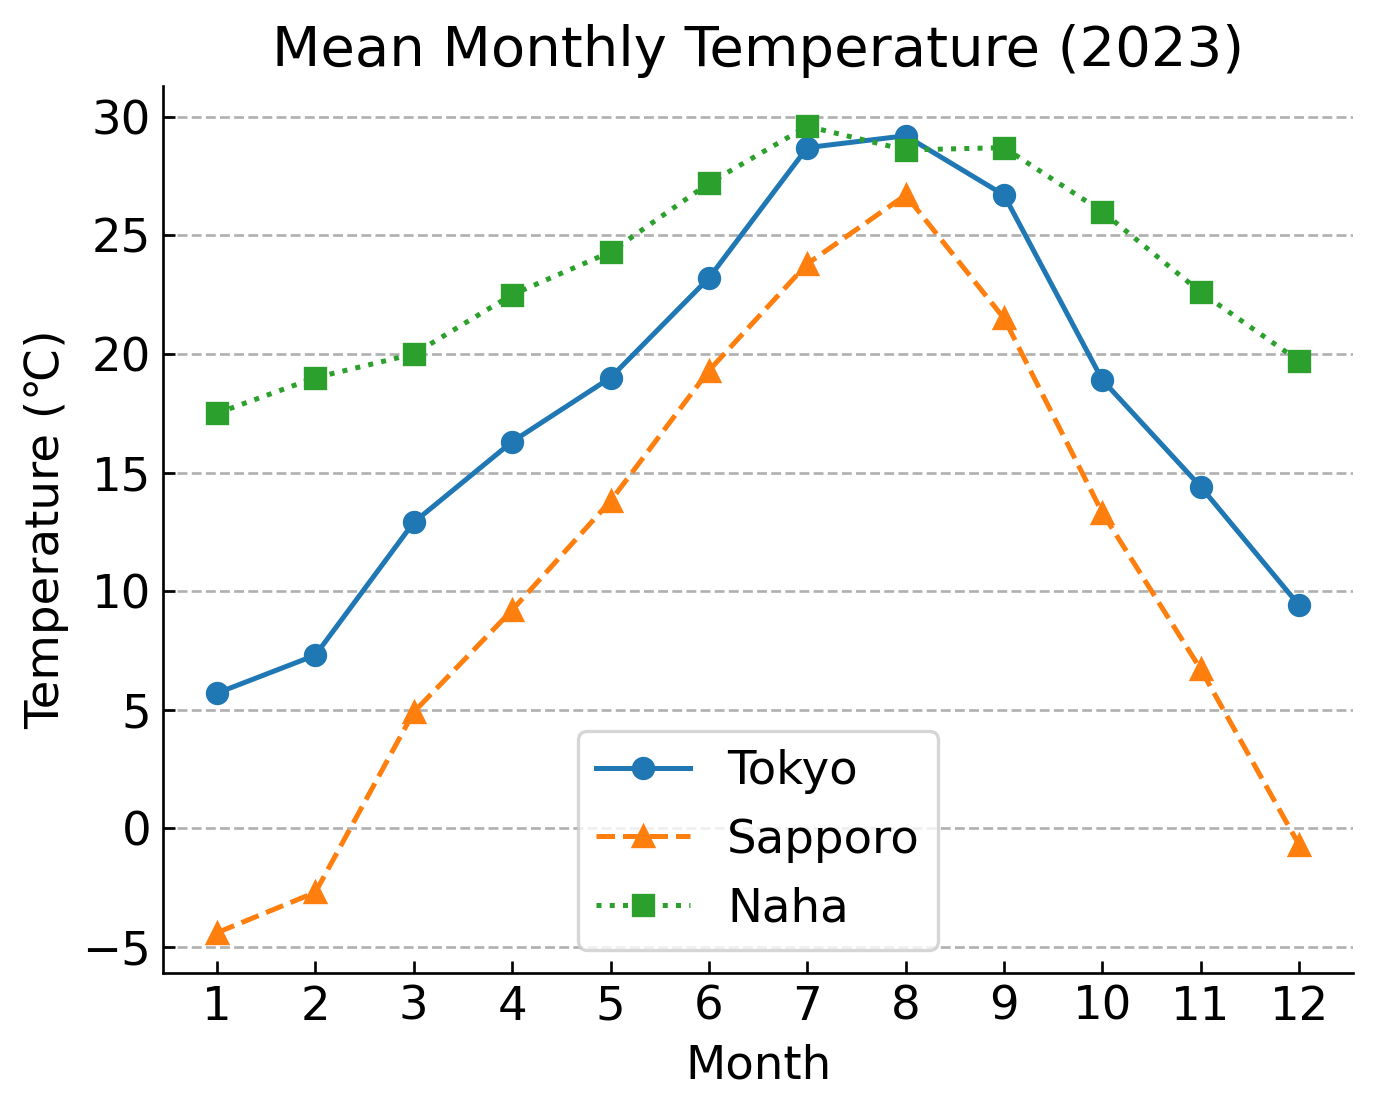

In [6]:
plt.style.use('example.mplstyle')
fig, ax = plt.subplots()

# For marker values see:
# https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers
# For line styles see:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_linestyle

ax.plot(
    weather_data_2023['month'],
    weather_data_2023['tokyo_mean'],
    label='Tokyo',
    marker='o',
)

ax.plot(
    weather_data_2023['month'],
    weather_data_2023['sapporo_mean'],
    label='Sapporo',
    marker='^',
    linestyle='--',
)

ax.plot(
    weather_data_2023['month'],
    weather_data_2023['naha_mean'],
    label='Naha',
    marker='s',
    linestyle=':',
)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_xlabel('Month')

ax.set_ylabel('Temperature (℃)')
ax.grid(True, which='major', axis='y')

ax.legend()

ax.set_title('Mean Monthly Temperature (2023)')

plt.savefig('figs/monthly_all_2023.png')
plt.savefig('figs/monthly_all_2023.pdf')

plt.show()

### Multiple plots in one figure and custom legend

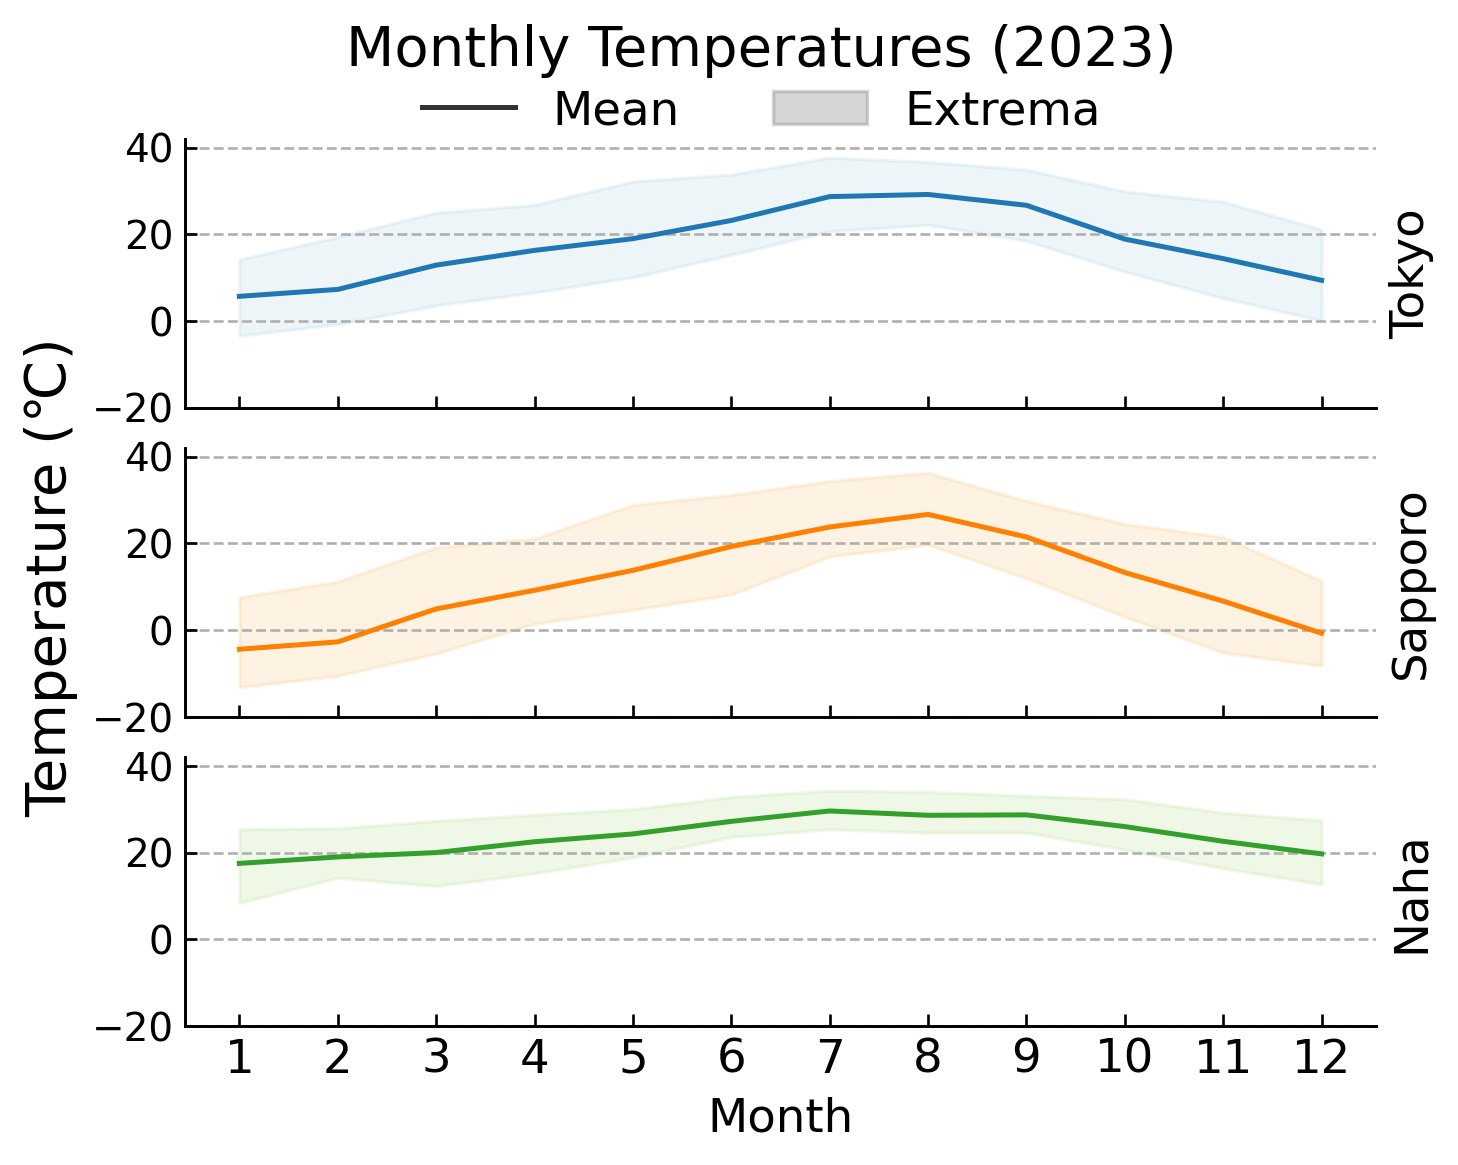

In [7]:
# Use a function responsible for a single plot
def plot(ax: Axes, params: dict):
    # Using a dictionary keeps the function signature simple and the script flexible.
    city = params['city']
    ax.fill_between(
        weather_data_2023['month'],
        weather_data_2023[f'{city}_low'],
        weather_data_2023[f'{city}_high'],
        alpha=0.2,
        color=params['extrema_color'],
    )

    ax.plot(
        weather_data_2023['month'],
        weather_data_2023[f'{city}_mean'],
        color=params['mean_color'],
    )

    # Hack to quickly position a label to the right of the plot.
    # Create a secondary y-axis, but hide it and only use the ylabel function.
    right_y_ax = ax.twinx()
    right_y_ax.tick_params(length=0)  # No ticks
    right_y_ax.set_yticks([])  # No tick labels
    right_y_ax.set_ylabel(city.capitalize())


plt.style.use('example.mplstyle')
# In case of multiple plots, axs will be an array of plots.
# If we create plots in a grid (i.e., nrows and ncols > 1), axs will be a
# multidimensional array.
fig, axs = plt.subplots(
    nrows=3,  # Create plots in three rows
    sharex=True,  # Plots share x-axis
    gridspec_kw={
        'hspace': 0.15  # Adjust (in this case decrease) horizontal space between plots
    },
)

plot(axs[0],
     {
    'city': 'tokyo',
    'mean_color': '#1f78b4',
    'extrema_color': '#a6cee3',
})
plot(axs[1],
     {
    'city': 'sapporo',
    'mean_color': '#ff7f00',
    'extrema_color': '#fdbf6f',
})
plot(axs[2],
     {
    'city': 'naha',
    'mean_color': '#33a02c',
    'extrema_color': '#b2df8a',
})

# Loop over plots to set properties that are the same for all plots.
for ax in axs:
    ax.set_ylim(-20, 42)  # y-axes limits
    ax.yaxis.set_major_locator(ticker.MultipleLocator(20))  # Ticks in multiple of 20
    ax.tick_params('y', labelsize='small')  # Smaller y-axis tick labels
    ax.grid(True, which='major', axis='y')  # Enable y-axis grid
# Fontsizes can be specified relative to the base fontsize using these keywords:
# 'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'
# Alternatively you can specify them as a number in pt.

# Since the plots share the x-axis, we only want ticks and labels for the bottom plot.
axs[2].xaxis.set_major_locator(ticker.MultipleLocator(1))
axs[2].set_xlabel('Month')

# For figures with multiple plots it can be useful to use sup functions which are
# somewhat of a "Super" function, which add labels/titles relative to the entire
# figure, not individual plots.
fig.supylabel('Temperature (℃)')
fig.suptitle('Monthly Temperatures (2023)')

# We want to create a custom legend which contains entries that are not styles like any
# of the individual plots. For this, we have to create "fake" artists first.
# Create artist representing a gray line
mean_artist = Line2D(  # Create a line
    [0], [0],  # x and y coordinates (unused but required by the constructor)
    color='#333333',  # Line color
)
# Create artist representing a transparent gray patch
extrema_artist = Patch(  # Create a patch (i.e., a colored area)
    alpha=0.2,  # Transparency
    color='#333333',
)

# Create legend with fake artists
fig.legend([mean_artist, extrema_artist],
           ['Mean', 'Extrema'],  # Labels attached to artists
           frameon=False,  # No legend border
           ncol=2,  # Put entries in two columns
           loc='upper center',  # Place the anchor at the upper center of the legend's bounding box
           bbox_to_anchor=(0.5, 0.96), #  Put the anchor at these (x,y) coordinates
           )
# Legend placement is a whole topic by itself. For more info see the loc parameter here:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html#matplotlib.pyplot.legend
# Without bbox_to_anchor, loc describes the placement of the legend within the plot.
# In the presence of bbox_to_anchor it refers to the placement of the anchor to the
# legend's bounding box.
# For precise legend placement use bbox_to_anchor. The coordinates are relative to the
# figure, e.g., (0.5, 1) would place the legend in the top center of the figure (even
# above the title).

plt.savefig('figs/monthly_all_2023_multiplot.png')
plt.savefig('figs/monthly_all_2023_multiplot.pdf')

plt.show()

### Box plot

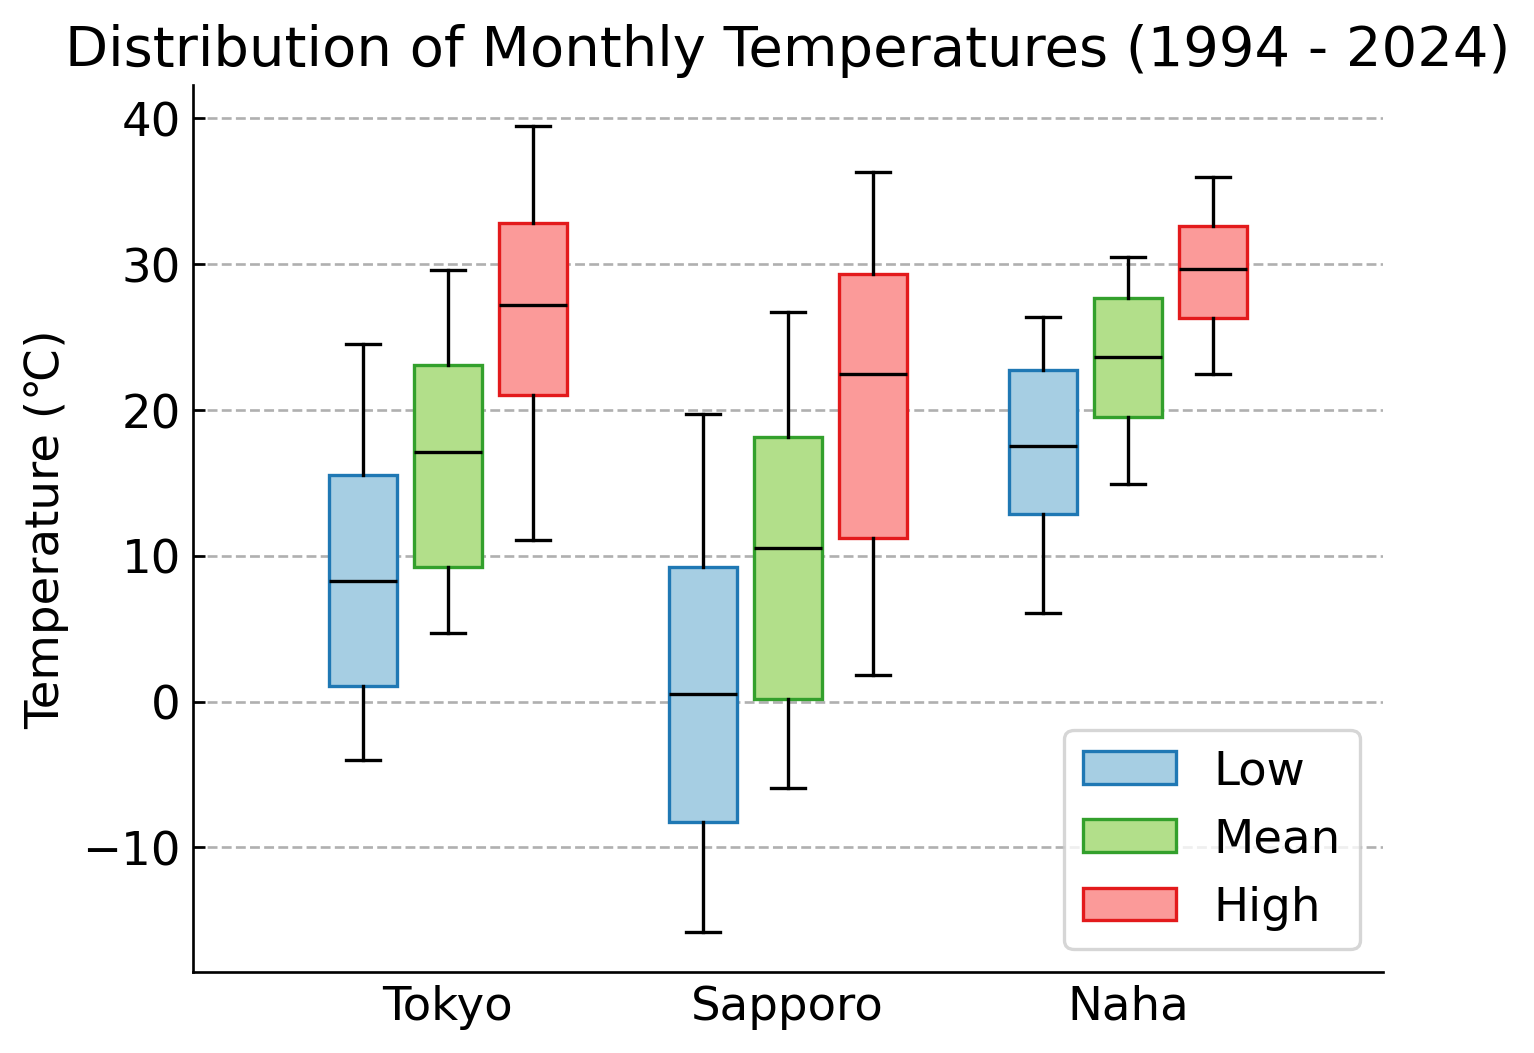

In [8]:
plt.style.use('example.mplstyle')
fig, ax = plt.subplots()
# We need to specify the x-coordinates of the boxes.
# This simply creates a list [0, 1, 2].
# We use numpy since we can then use simply array arithmetic to offset the coordinates.
box_x_pos = np.arange(3)

# The offset and box width need to be set manually so that boxes do not overlap.
x_offset = 0.25
box_width = 0.2

ax.boxplot([weather_data['tokyo_low'], weather_data['sapporo_low'], weather_data['naha_low']],
           positions=box_x_pos - x_offset,  # Shift first set of boxes to the left
           widths=box_width,
           medianprops={'color': 'black'},  # Make the median line black
           patch_artist=True,  # Required to fill the box with a different color
           boxprops={'facecolor': '#a6cee3',  # Fill color of the box
                     'edgecolor': '#1f78b4',  # Border color
                     },
           label='Low',
           )
ax.boxplot([weather_data['tokyo_mean'], weather_data['sapporo_mean'], weather_data['naha_mean']],
           positions=box_x_pos,  # No shift
           widths=box_width,
           medianprops={'color': 'black'},
           patch_artist=True,
           boxprops={'facecolor': '#b2df8a',
                     'edgecolor': '#33a02c'
                     },
           label='Mean',
           )
ax.boxplot([weather_data['tokyo_high'], weather_data['sapporo_high'], weather_data['naha_high']],
           positions=box_x_pos + x_offset,  # Shift to the right
           widths=box_width,
           medianprops={'color': 'black'},
           patch_artist=True,
           boxprops={'facecolor': '#fb9a99',
                     'edgecolor': '#e31a1c'
                     },
           label='High',
           )

# Manually set x-tick labels.
ax.set_xticks(box_x_pos, ['Tokyo', 'Sapporo', 'Naha'])
# Do not show x ticks.
ax.tick_params('x', length=0)

ax.set_ylabel('Temperature (℃)')
ax.grid(True, which='major', axis='y')

ax.legend()

ax.set_title('Distribution of Monthly Temperatures (1994 - 2024)')

plt.savefig('figs/monthly_all_boxplot.png')
plt.savefig('figs/monthly_all_boxplot.pdf')

plt.show()

### Heatmap

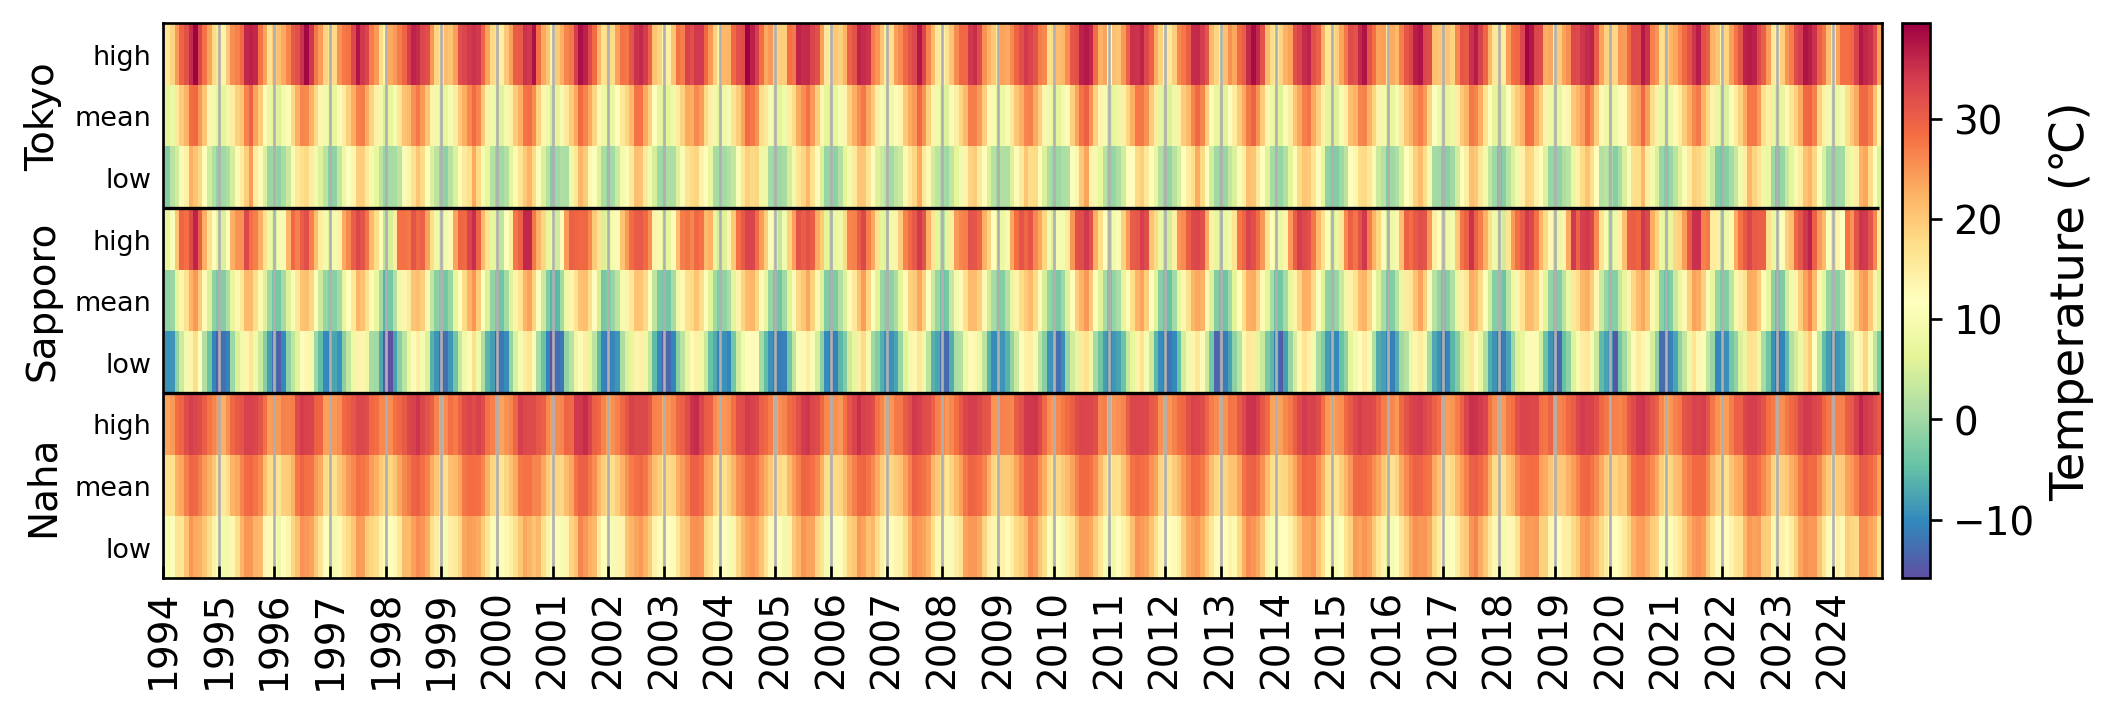

In [9]:
plt.style.use('example.mplstyle')
# Make figure larger
fig, ax = plt.subplots(figsize=(11, 3))
transposed_data = weather_data[['tokyo_high', 'tokyo_mean', 'tokyo_low', 'sapporo_high',
                                'sapporo_mean', 'sapporo_low', 'naha_high', 'naha_mean', 'naha_low']].T
im = ax.imshow(
    transposed_data,
    aspect='auto',  # Heatmap cells do not have to be square
    cmap='Spectral_r',  # Colormap (reversed)
)
# For more colormaps see:
# https://matplotlib.org/stable/users/explain/colors/colormaps.html

# Add a colorbar legend
cbar = ax.figure.colorbar(
    im,
    label='Temperature (℃)',
    pad=0.01,  # Decrease padding to plot
)
# Adjust tick params of colorbar
cbar.ax.tick_params(
    labelsize='small',  # Smaller font
    direction='out',  # Ticks to the outside
)

# Get January entries for label positioning.
year_pos = weather_data[weather_data['month'] == 1]['year']
ax.set_xticks(
    year_pos.index,  # x-coord
    year_pos,  # Year
    rotation=90,  # Rotate labels by 90 degree
    fontsize='small',
)

# Show all spines (plot borders)
ax.spines[:].set_visible(True)

ax.set_xlim(xmin=0)

# Draw lines to separate cities.
# We draw two lines. Since we have three entries per city and start counting at 0, we
# need to position them at y-coords 2.5 and 5.5.
max_x = weather_data.index.max()
ax.hlines(
    [2.5, 5.5],  # Draw lines at these y positions
    0, max_x,  # Draw from x-coord 0 to max_x
    colors='black',
    linewidths=1,
)

# Enable (solid) x grid.
ax.grid(True, 'major', 'x', linestyle='-')

ax.set_yticks(
    np.arange(9),
    ['high', 'mean', 'low'] * 3,  # Pythonic way to repeat this list three times
    fontsize='xx-small'
)
ax.tick_params('y', length=0)

# Manually place city names.
# Here the coordinates are in data format so need some trial and error.
city_label_x_offset = -30
ax.text(
    city_label_x_offset,
    1,  # y-coord
    'Tokyo',
    rotation=90,
    verticalalignment='center',
    size='small',
)
ax.text(
    city_label_x_offset,
    4,
    'Sapporo',
    rotation=90,
    verticalalignment='center',
    size='small',
)
ax.text(
    city_label_x_offset,
    7,
    'Naha',
    rotation=90,
    verticalalignment='center',
    size='small',
)

plt.savefig('figs/temperature_heatmap.png')
plt.savefig('figs/temperature_heatmap.pdf')

plt.show()

### Scatter plot with annotation

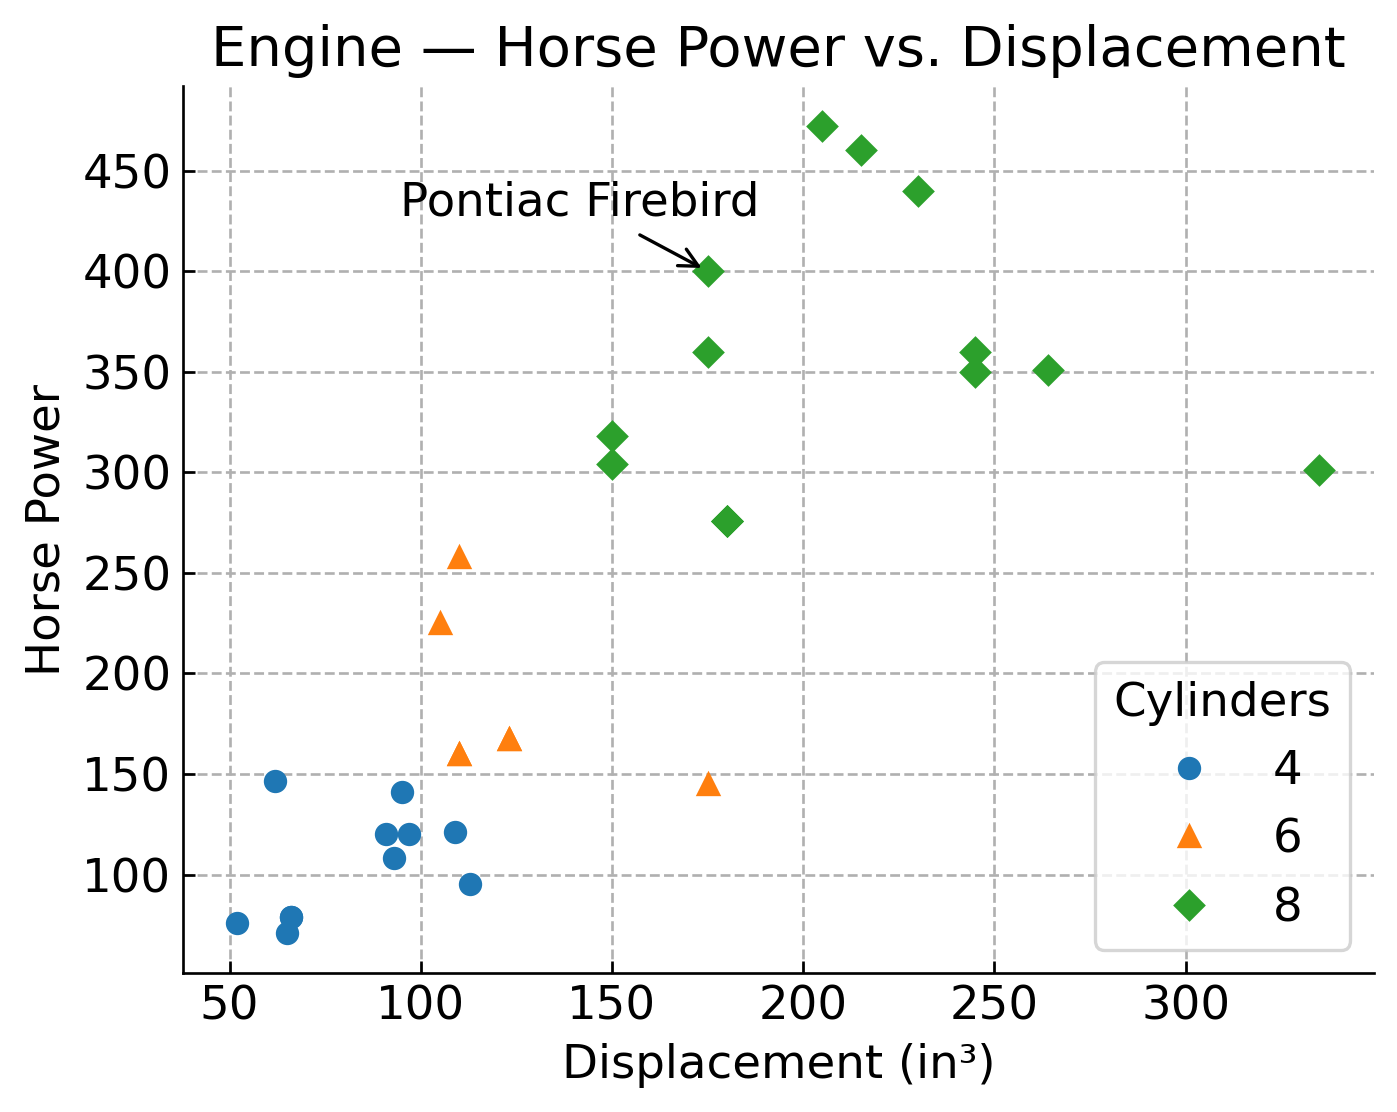

In [10]:
plt.style.use('example.mplstyle')
fig, ax = plt.subplots()
cylinders = [4, 6, 8]
markers = {
    4: 'o',
    6: '^',
    8: 'D',
}
for num_cylinders in cylinders:
    # Plot horse power (hp) on x-axis and displacement (disp) on y.
    # You can pass a data frame with date= and then only use the string labels, which
    # simplifies some cases.
    ax.plot(
        'hp',
        'disp',
        data=car_data[car_data['cyl'] == num_cylinders],
        linestyle='',  # No lines
        marker=markers[num_cylinders],  # Lookup marker style in dict
        label=num_cylinders,
    )

ax.set_ylabel('Horse Power')
ax.set_xlabel('Displacement (in³)')

ax.legend(title='Cylinders')

ax.grid(True, which='major', axis='both')

ax.set_title('Engine — Horse Power vs. Displacement')

# Create annotation for Pontiac Firebird.
# Get data row.
firebird = car_data[car_data['rownames'] == 'Pontiac Firebird']
ax.annotate(
    'Pontiac Firebird',
    (firebird['hp'].iloc[0], firebird['disp'].iloc[0]),  # Bit convoluted way to get field values
    textcoords='offset fontsize',  # Interpret xytext values as an offset, not absolute data values.
    xytext=(-6.6, 1.2),  # Offset of label from data point
    arrowprops={'arrowstyle': '->'}  # Draw an arrow
)

plt.savefig('figs/engine_scatter.png')
plt.savefig('figs/engine_scatter.pdf')

plt.show()

### Stacked bar plot with hatching

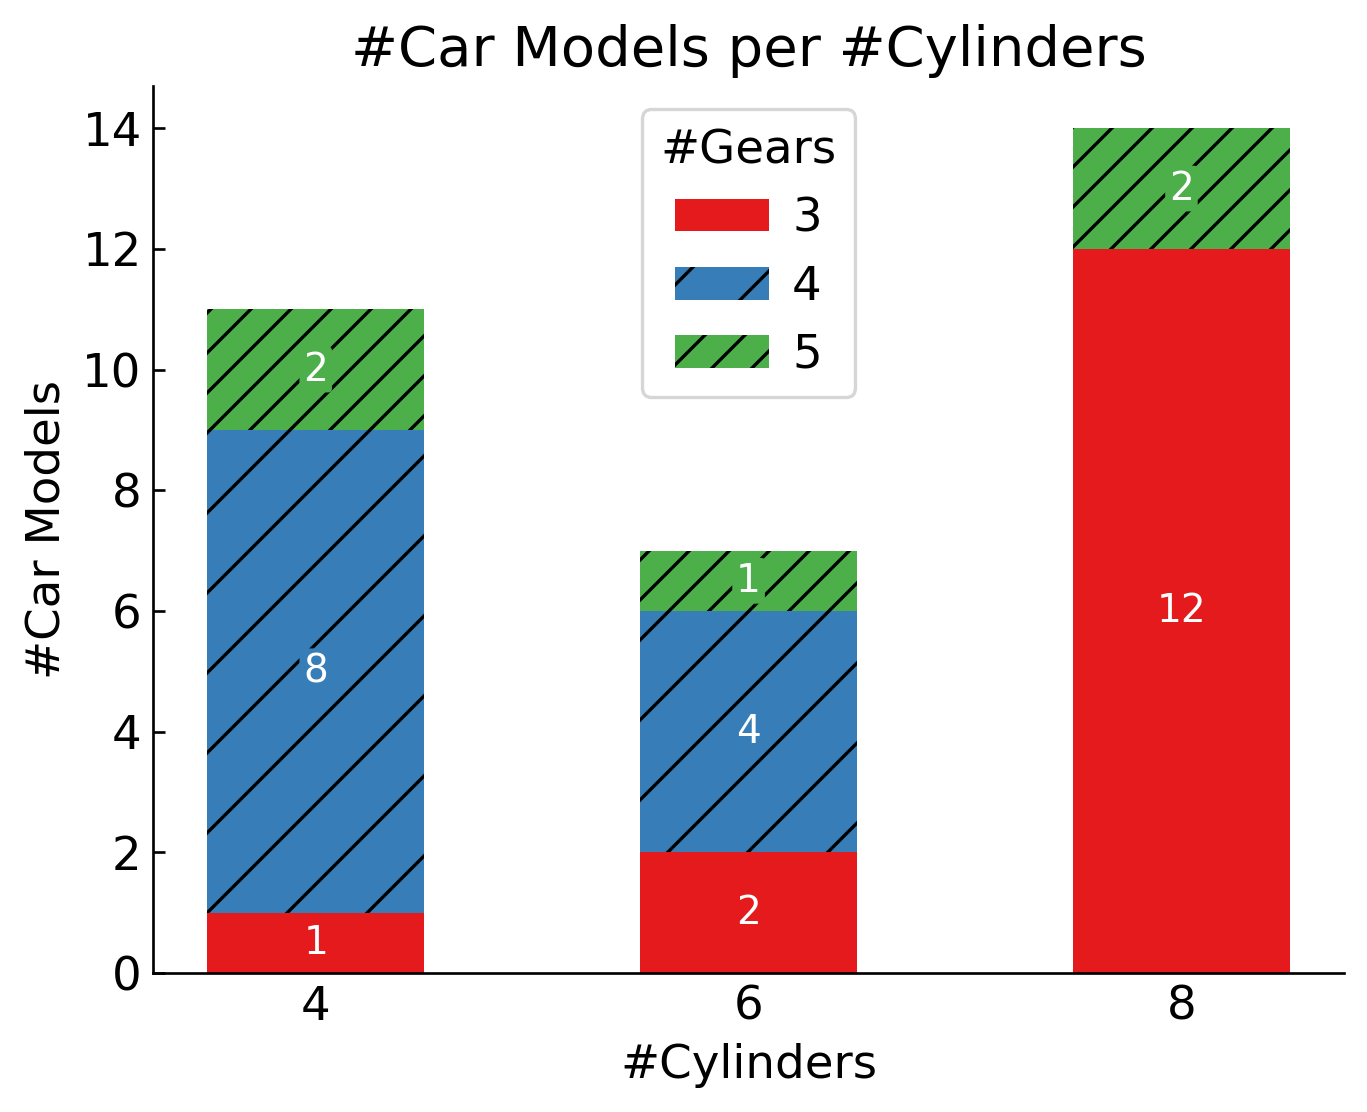

In [11]:
# Some data wrangling to get values in a nicer format.
cyl_gear = car_data.groupby(['cyl', 'gear'])[['rownames']].count()
cyl_values = list(sorted(car_data['cyl'].unique()))
cyl_idx = {cyl: idx for idx, cyl in enumerate(cyl_values)}
gear_values = list(sorted(car_data['gear'].unique()))
gear_idx = {gear: idx for idx, gear in enumerate(gear_values)}
bar_data = np.zeros((len(cyl_values), len(gear_values)), dtype=int)
for row in cyl_gear.itertuples():
    cyl, gear = row.Index
    bar_data[gear_idx[gear], cyl_idx[cyl]] = row.rownames

plt.style.use('example.mplstyle')
fig, ax = plt.subplots()

x_pos = np.arange(3)
gear_hatching = {
    3: '',
    4: '/',
    5: '//',
}
gear_colors = {
    3: '#e41a1c',
    4: '#377eb8',
    5: '#4daf4a',
}

for gear, idx in gear_idx.items():
    # Plot bars. One plot call plots multiple bars.
    bar = ax.bar(
        x_pos,
        bar_data[idx, :],
        # To get stacked bars, you need to specify where the bottom of each bar starts.
        bottom=bar_data[:idx, :].sum(axis=0),
        label=gear,
        hatch=gear_hatching[gear],
        color=gear_colors[gear],
        width=0.5,
    )
    # Add labels inside the bars.
    ax.bar_label(bar,
                 label_type='center',
                 size='small',
                 # Display numbers as integers and do not show them if they are zero.
                 fmt=lambda t: f'{t:.0f}' if t else '',
                 color='white',
                 # For better readability against the hatching background add solid
                 # color around the label. This would normally work simply with
                 # backgroundcolor=, but in this plot the box will be too large so we
                 # have to specify it manually.
                 bbox={'boxstyle': 'Round, pad=0.1',
                       'facecolor': gear_colors[gear],
                       'edgecolor': 'None',
                       },
                 )
ax.legend(title='#Gears', handletextpad=0.5)

ax.set_ylabel('#Car Models')

ax.set_xlabel('#Cylinders')
ax.set_xticks(list(cyl_idx.values()), cyl_idx.keys())
ax.tick_params('x', length=0)

ax.set_title('#Car Models per #Cylinders')

plt.savefig('figs/car_bars.png')
plt.savefig('figs/car_bars.pdf')

plt.show()